records must be classified based on ANTI-BIOFILM_AGENT, once after segregating<br>
and grouping records with values matching as mentioned previously<br>
fishout the record with max inhibition value from categorized groups (categorized based on ANTI-BIOFILM-AGENT)<br>
push them into a parent file which's comprised of max values fetched from BIOFILM-AGENT categorized csv files<br>
<br>
UPDATE: planning to plot distribution table for inhibition values

installing seaborn via pip

In [1]:
! pip install seaborn

In [18]:
import seaborn as sns# for plotting distribution table of inhibition values

In [19]:
from matplotlib import pyplot as plt # considering the abv cause

In [20]:
import csv # for handling csv files

In [21]:
csv.__version__ # checking for a valid version

'1.0'

In [22]:
# file from which data is obtained and processed
# .csv extension needn't be mentioned
src_file = "biofilm-ecoli-filtered" 

In [23]:
# returns an exhaustable iterator, 
# so putting those into a list for processing

with open(F"{src_file}.csv", 'r') as jammer:
    src_data = list(csv.reader(jammer)) # delimiter's , by default
    
# the abv src data will be used in further proceedings

In [24]:
# another file has to be created where rows with decrease must be removed
# under inhibition col.
filtered_data = list(filter(lambda x: True if x[6]!="Decrease" else False, src_data))

# in the same file if we encounter unique characters just omit it. (handling +- cases in inhibition)

# function to filter out unwanted sybmols and values
def ommiter(x: str)->str:
    fnl_inhbtn_val = ""
    for i in x[6]:
        fnl_inhbtn_val += i if any((i.isdigit(), i.isspace(), i=="%", i==".")) else ""
    
    x[6] = fnl_inhbtn_val

list(map(ommiter, filtered_data[1:]))# implementing the abv function to whole data-set, which would impact filtered_data

# kell = filtered_data[105][6]
# kell 
# for i in kell:
#     print(i if any((i.isdigit(), i.isspace(), i=="%", i==".")) else "")
None

In [25]:
# writing down the finalized, classified data into csv file 
finalised_csv_file_name = "classified_sheet_eliminated_specialChars_Decrease"
with open(F"{finalised_csv_file_name}.csv", 'w', newline="") as jammer:
    writer = csv.writer(jammer, delimiter=",")
    writer.writerows(filtered_data)

In [26]:
# using a dictionary
# to have keys as unique anti-biofilm-agent names
# the values would be a list containing another list
# of rows where col2 or idx1 in it matches the key
# holding list of rows.
# if no such key exists, then create a new key
# and store the row in list corresponding to that key

source_dict = dict() 

for i in filtered_data:
    if i[1] in source_dict: # i[1]'s matched with keys in src_dict
        source_dict[i[1]].append(i)
    else:
        # initializing a key pointing a list with a row in it
        source_dict[i[1]] = [i]

        
# source_dict # ANTI-BIO-FILM AGENT

In [27]:
# with classified/grouped rows under unqique anti-biofilm-agent keys
# every grouped content of keys in source_dict should be put in csv files with having group's key as filename
reserve = source_dict.get("ANTI-BIO-FILM AGENT")[0]
del source_dict["ANTI-BIO-FILM AGENT"]

for file_name in source_dict: # traversin 
    with open(F"anti-biofilm-agents/{file_name}.csv", 'w', newline="") as jammer:
        holder = csv.writer(jammer) # de-limiter's ',' by default
        holder.writerow(reserve)
        holder.writerows(source_dict[file_name])

In [28]:
# after classifying and writing the grouped data into seperate files with file names being biofilm agents
# now the row with max inhibition value from every group must be took and put in a file

file_name_with_max_rows = "data_sheet_max_row_vals_unique_biofilm_agents"

# finding max data for everykey and putting it inside an array
final_arr = list()

for key in source_dict:
        final_arr.append(max(source_dict[key], key=lambda x: float(x[6][:-2])))

with open(F"{file_name_with_max_rows}.csv", 'w', newline='') as jammer:
    holder = csv.writer(jammer) # by default delimiter's ','
    # putting column headings in
    holder.writerow(reserve)
    # putting max data extracted in
    holder.writerows(final_arr)
    

In [29]:
# plotting distribution graph for inhibition data-set

# preparing data for distribution of inhibition vals
dist_data = list(map(lambda x : float(x[6][:-2]), filtered_data[1:])) # gotta exempt first row, it has stuff to do with headings

Text(-8.305555555555555, 0.5, 'frequency of inhibition values of domains')

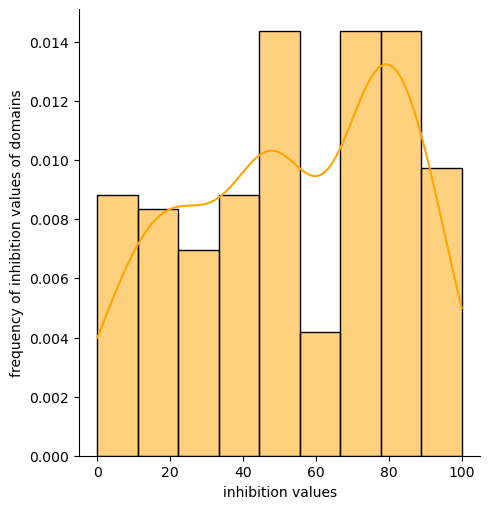

In [35]:
# plotting it
sns.displot(dist_data, kind='hist', color='orange', kde=True, stat="density")
plt.xlabel("inhibition values")
plt.ylabel("frequency of inhibition values of domains")